<img src='Market Basket.jpg' />

# Importing Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import pandas_profiling
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)

def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()
import IPython

IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

### Lengends:

**data_pedido** :         pizza order date<br>
**hora_pedido** :         pizza order time<br>
**tipo_entrega** :        pizza picked up on site or delivered<br>
**valor_borda** :         pizza,bordered or without<br>
**valor_refrigerante** :  bought soda yes or no<br>
**valor_total** :         total purchase amount<br>
**tempo** :               pizza delivery time<br>

# Data Overview

In [57]:
data = pd.read_csv('dados_pizzaria.csv', parse_dates = ['data_pedido','hora_pedido','tempo'])
data.head()

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo
0,2011-10-07,2020-01-09 18:45:00,Buscar,0.0,0.0,32.0,2020-01-09 00:30:00
1,2011-10-07,2020-01-09 18:47:00,Buscar,0.0,0.0,30.0,2020-01-09 00:43:00
2,2011-10-07,2020-01-09 18:49:00,Buscar,0.0,0.0,27.0,2020-01-09 00:42:00
3,2011-10-07,2020-01-09 18:50:00,Buscar,0.0,0.0,30.0,2020-01-09 00:40:00
4,2011-10-07,2020-01-09 18:52:00,Buscar,0.0,0.0,30.0,2020-01-09 00:23:00


# Data investigation

In [58]:
# checking values null
print('Number of values null:\n',data.isnull().sum())
print('='*145)
# checking number of lines and columns
print('Number of lines:', data.shape[0])
print('Number of columns:', data.shape[1])
print('='*145)
# checking values uniques
print('Values Uniques:',data.nunique())

Number of values null:
 data_pedido           0
hora_pedido           0
tipo_entrega          0
valor_borda           0
valor_refrigerante    0
valor_total           0
tempo                 0
dtype: int64
Number of lines: 2272
Number of columns: 7
Values Uniques: data_pedido           112
hora_pedido           330
tipo_entrega            3
valor_borda             3
valor_refrigerante      8
valor_total            68
tempo                  46
dtype: int64


In [59]:
print('Checking value of column tipo_entrega \n',data['tipo_entrega'].value_counts())
print('='*145)
print('Checking value of column valor_borda \n',data['valor_borda'].value_counts())
print('='*145)
print('Checking value of column valor_refrigerante \n',data['valor_refrigerante'].value_counts())
print('='*145)

Checking value of column tipo_entrega 
 Entrega    1318
Buscar      937
buscar       17
Name: tipo_entrega, dtype: int64
Checking value of column valor_borda 
 0.0    1989
2.5     153
3.0     130
Name: valor_borda, dtype: int64
Checking value of column valor_refrigerante 
 0.0    1868
4.5     215
4.0      88
5.0      81
2.0       7
8.5       6
2.5       5
9.0       2
Name: valor_refrigerante, dtype: int64


### Conclusions

1. The columns **hora_pedido** and **tempo** let's just keep hours and minute
2. the columns **valor_borda** and **valor_refrigerante** let's rename to **borda** and **refrigerante**
3. the column **tipo_entrega** Capitalizing all records

# Data Preparation

In [60]:
# converting  " hora_pedido " in just hour
data['hora_pedido'] = data['hora_pedido'].dt.hour

# converting  " tempo " in just minute
data['tempo'] = data['tempo'].dt.minute

# renaming  " valor_borda " to "borda " and " valor_refrigerante " to "refrigerante "
data.rename(columns = {'valor_borda':'borda', 'valor_refrigerante':'refrigerante'}, inplace = True) 

# Capitalizing all records
data['tipo_entrega'] = data['tipo_entrega'].str.capitalize()

# viewing results
data.head()

,data_pedido,hora_pedido,tipo_entrega,borda,refrigerante,valor_total,tempo
0,2011-10-07,18,Buscar,0.0,0.0,32.0,30
1,2011-10-07,18,Buscar,0.0,0.0,30.0,43
2,2011-10-07,18,Buscar,0.0,0.0,27.0,42
3,2011-10-07,18,Buscar,0.0,0.0,30.0,40
4,2011-10-07,18,Buscar,0.0,0.0,30.0,23


# Feature Engineering

In [61]:
# Extract year  of "data_pedido"
data['ano'] = data['data_pedido'].dt.year

# Extract weekday  of "data_pedido"
data['semana']=  data[['data_pedido']].apply(lambda x: dt.datetime.strftime(x['data_pedido'], '%A'), axis=1)

# replace name in english to portuguese
data.loc[:, 'semana'].replace(['Monday', 'Sunday', 'Friday','Tuesday','Wednesday','Thursday','Saturday'], 
                                           ['Segunda', 'Domingo', 'Sexta','Terça','Quarta','Quinta','Sabado'], inplace=True)
# Extract name of month of "data_pedido"
data['mes'] = data['data_pedido'].apply(lambda x: x.strftime('%B')) 

# replace name in english to portuguese
data.loc[:, 'mes'].replace(['January','February','November','December','October'], 
                                     ['Jan', 'Fev', 'Nov','Dez','Out'], inplace=True)

# replace values numeric to binary
data['borda'] = data['borda'].map(lambda x : 'borda-nao' if x <= 0 else 'borda-sim')

# replace values numeric to binary
data['refrigerante'] = data['refrigerante'].map(lambda x : 'refrigerante-nao' if x <= 0 else 'refrigerante-sim')


In [62]:
# records removed  of year 2015
data = data[data['ano'] != 2015]

In [63]:
# Creating intevals to column " hora_pedido "
bins =  [   0,      18,   21,      np.inf]
names = ["inicio",  "pico",  "final_expediente"]
data['hora_pedido'] = pd.cut(data['hora_pedido'], bins, labels=names)

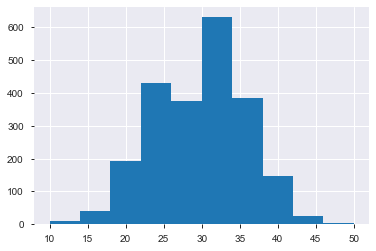

In [64]:
# Analyzing Distribution of " valor_total"
distribution = data['valor_total']
hist = plt.hist(distribution)

In [65]:
# viewing intervals
hist[1]

array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.])

In [66]:
# Creating intevals to column " valor_total "
bins =  [   10,      14,        18,          22,     26,       30,        34,       38,             42,            46, np.inf]
names = ["vl-10-14",  "vl-14-18",  "vl-18-22",    "vl-22-26",  "vl-26-30",   "vl-30-34",  "vl-34-38",  "vl-38-42",       "vl-42-46",       "vl-46-50"]
data['valor_total'] = pd.cut(data['valor_total'], bins, labels=names)

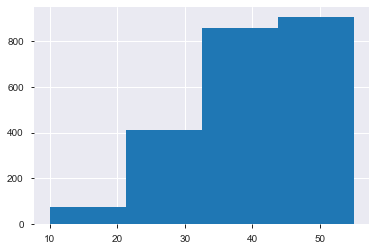

In [67]:
# Analyzing Distribution of " tempo "
distribution_tempo = data['tempo']
hist = plt.hist(distribution_tempo,bins=4)

In [68]:
# viewing intervals
hist[1]

array([10.  , 21.25, 32.5 , 43.75, 55.  ])

In [69]:
# Creating intevals to column " tempo "
bins =  [   10,      22,        33,          44,      np.inf]
names = ["tp-10-22",  "tp-22-33",  "tp-33-44",    "tp-44-55"]
data['tempo'] = pd.cut(data['tempo'], bins, labels=names)

# viewing results
data.head()

,data_pedido,hora_pedido,tipo_entrega,borda,refrigerante,valor_total,tempo,ano,semana,mes
0,2011-10-07,inicio,Buscar,borda-nao,refrigerante-nao,vl-30-34,tp-22-33,2011,Sexta,Out
1,2011-10-07,inicio,Buscar,borda-nao,refrigerante-nao,vl-26-30,tp-33-44,2011,Sexta,Out
2,2011-10-07,inicio,Buscar,borda-nao,refrigerante-nao,vl-26-30,tp-33-44,2011,Sexta,Out
3,2011-10-07,inicio,Buscar,borda-nao,refrigerante-nao,vl-26-30,tp-33-44,2011,Sexta,Out
4,2011-10-07,inicio,Buscar,borda-nao,refrigerante-nao,vl-26-30,tp-22-33,2011,Sexta,Out


In [70]:
# Sorting the days of the week
data['semana'] = pd.Categorical(data['semana'], categories=
    ['Segunda','Terça','Quarta','Quinta','Sexta','Sabado', 'Domingo'],
    ordered=True)
semana_sort= data['semana'].value_counts().sort_index()

In [71]:
# Graph Number of Pizzas by Day of the Week
value = semana_sort
label = value.index
trace = go.Bar(y=value, 
               x=label,
               marker={'color': value,
                   'colorscale': 'Spectral'})
layout = go.Layout(title="Figure 1 - Number of Pizzas for Day of Week", 
                   xaxis={'title' : "Day of Week"},
                  yaxis={'title' : "Number of Pizza"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\Users\rspro\Anaconda3
    C:\Users\rspro\Anaconda3\Library\mingw-w64\bin
    C:\Users\rspro\Anaconda3\Library\usr\bin
    C:\Users\rspro\Anaconda3\Library\bin
    C:\Users\rspro\Anaconda3\Scripts
    C:\Users\rspro\Anaconda3\bin
    C:\Users\rspro\Anaconda3\condabin
    C:\Users\rspro\Anaconda3
    C:\Users\rspro\Anaconda3\Library\mingw-w64\bin
    C:\Users\rspro\Anaconda3\Library\usr\bin
    C:\Users\rspro\Anaconda3\Library\bin
    C:\Users\rspro\Anaconda3\Scripts
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath
    C:\Windows\system32
    C:\Windows
    C:\Windows\System32\Wbem
    C:\Windows\System32\WindowsPowerShell\v1.0
    C:\Windows\System32\OpenSSH
    C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common
    C:\Program Files\MySQL\MySQL Shell 8.0\bin
    C:\Users\rspro\AppData\Local\Microsoft\WindowsApps
    C:\Users\rspro\AppData\Local\GitHubDesktop\bin

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


In [72]:
# Graph Number of Pizzas by Intervals of Time
value = data['hora_pedido'].value_counts()
label = value.index
trace = go.Bar(y=value, 
               x=label,
               marker={'color': value,
                   'colorscale': 'Spectral'})
layout = go.Layout(title="Figure 1 - Number of Pizzas for Intervals od Time", 
                   xaxis={'title' : "Intervals"},
                  yaxis={'title' : "Number of Pizza"},
                  title_x=0.5)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
fig.show('png')

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\Users\rspro\Anaconda3
    C:\Users\rspro\Anaconda3\Library\mingw-w64\bin
    C:\Users\rspro\Anaconda3\Library\usr\bin
    C:\Users\rspro\Anaconda3\Library\bin
    C:\Users\rspro\Anaconda3\Scripts
    C:\Users\rspro\Anaconda3\bin
    C:\Users\rspro\Anaconda3\condabin
    C:\Users\rspro\Anaconda3
    C:\Users\rspro\Anaconda3\Library\mingw-w64\bin
    C:\Users\rspro\Anaconda3\Library\usr\bin
    C:\Users\rspro\Anaconda3\Library\bin
    C:\Users\rspro\Anaconda3\Scripts
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath
    C:\Windows\system32
    C:\Windows
    C:\Windows\System32\Wbem
    C:\Windows\System32\WindowsPowerShell\v1.0
    C:\Windows\System32\OpenSSH
    C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common
    C:\Program Files\MySQL\MySQL Shell 8.0\bin
    C:\Users\rspro\AppData\Local\Microsoft\WindowsApps
    C:\Users\rspro\AppData\Local\GitHubDesktop\bin

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python
